In [43]:
import chess.pgn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')


pgn = open('clownpusherGames.txt')
length = 300
counter = 0

games = []

for i in range(length):
    try:
        if chess.pgn.read_game(pgn).mainline_moves():
            games.append(chess.pgn.read_game(pgn))
    except:
        pass
print(len(games))

250


In [44]:
bc_df = pd.DataFrame(columns= ['Date', 'White', 'Black', 'Result', 'WhiteElo', 'BlackElo', 'Termination', 'MainlineMoves'])
for game in games:
    bc_df = bc_df.append({'Date' : pd.to_datetime(game.headers["Date"]),
                    'White': game.headers["White"],
                    'Black': game.headers['Black'],
                    'Result': game.headers['Result'],
                    'WhiteElo': game.headers['WhiteElo'],
                    'BlackElo': game.headers['BlackElo'],
                    'Termination': game.headers['Termination'],
                    'MainlineMoves': game.mainline_moves()}, ignore_index=True)
bc_df['WhiteElo'] = bc_df['WhiteElo'].astype(int)
bc_df['BlackElo'] = bc_df['BlackElo'].astype(int)
bc_df.info()
bc_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           250 non-null    datetime64[ns]
 1   White          250 non-null    object        
 2   Black          250 non-null    object        
 3   Result         250 non-null    object        
 4   WhiteElo       250 non-null    int64         
 5   BlackElo       250 non-null    int64         
 6   Termination    250 non-null    object        
 7   MainlineMoves  250 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 15.8+ KB


,Date,White,Black,Result,WhiteElo,BlackElo,Termination,MainlineMoves
0,2020-03-19,Clownpusher,Ali-BOT,0-1,1233,1297,Ali-BOT won by resignation,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Be2 d5 5. Qx...
1,2020-03-19,Clownpusher,Ali-BOT,0-1,1220,1310,Ali-BOT won by resignation,1. Nf3 Nf6 2. e4 d6 3. Nc3 Bd7 4. a3 a6 5. Nd5...
2,2020-03-19,Clownpusher,Ali-BOT,0-1,1208,1322,Ali-BOT won by resignation,1. e4 c5 2. d4 h6 3. Nf3 b6 4. dxc5 e6 5. Nc3 ...
3,2020-03-19,Clownpusher,Jade-BOT,1/2-1/2,1201,1178,Game drawn by repetition,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...
4,2020-03-19,Gopakumarpb,Clownpusher,0-1,1005,1008,Clownpusher won by resignation,1. e4 e6 2. d4 Ke7 3. Nf3 f6 4. Nc3 Kf7 5. Bc4...
...,...,...,...,...,...,...,...,...
245,2020-12-18,Clownpusher,themachine31,1-0,2828,2577,Clownpusher won by resignation,1. f3 d6 2. Kf2 Kd7 3. d4 c6 4. e4 Kc7 5. c4 e...
246,2020-12-18,550x7,Clownpusher,0-1,2657,2840,Clownpusher won by resignation,1. Nf3 f6 2. e4 Kf7 3. d4 e6 4. Bd3 d5 5. c3 c...
247,2020-12-18,550x7,Clownpusher,0-1,2649,2848,Clownpusher won by resignation,1. Nf3 f6 2. d4 Kf7 3. e4 e6 4. Bd3 d5 5. Nbd2...
248,2020-12-18,550x7,Clownpusher,0-1,2641,2856,Clownpusher won by resignation,1. Nf3 f6 2. d4 Kf7 3. e4 e6 4. Bd3 d5 5. Nbd2...


In [45]:
# Sort by date
bc_df = bc_df.sort_values(by='Date')

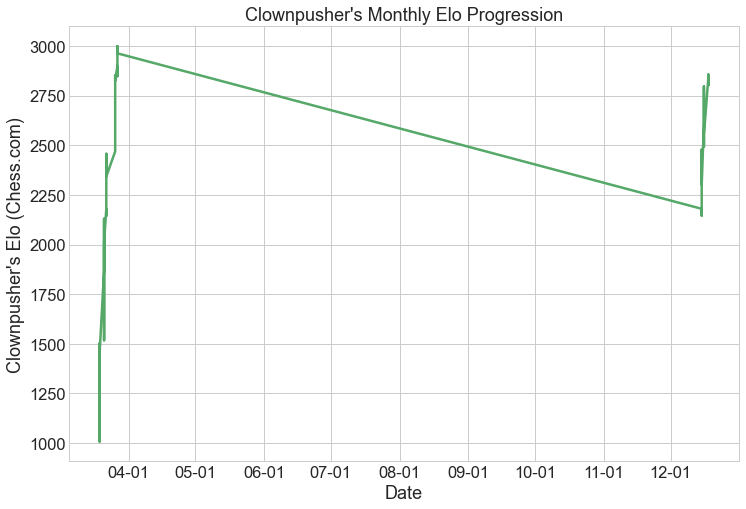

In [46]:
# Plotting Clownpushers's elo progression
clownpusher_elo = []
for index, row in bc_df.iterrows():
    if row['White'] == 'Clownpusher':
        clownpusher_elo.append(row['WhiteElo'])
    else:
        clownpusher_elo.append(row['BlackElo'])
dates = bc_df['Date']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dates, clownpusher_elo, '-g', linewidth=2.5)
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax.set(xlabel="Date", ylabel="Clownpusher's Elo (Chess.com)", title="Clownpusher's Monthly Elo Progression")
plt.savefig("monthly_elo.png")

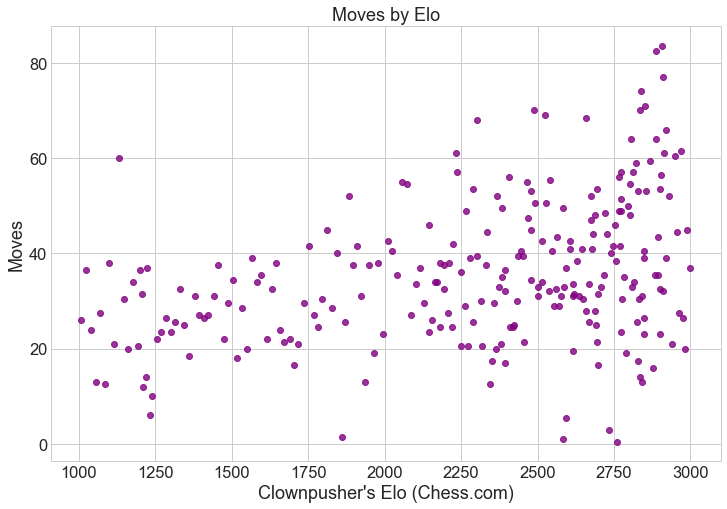

In [47]:
# Plotting Clownpushers's elo progression vs number of moves played
moves = []
for index, row in bc_df.iterrows():
    counter = 0
    for move in row['MainlineMoves']:
        counter += 1
    moves.append(counter / 2)
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(clownpusher_elo, moves, alpha=0.8, c='purple')
ax.set(xlabel="Clownpusher's Elo (Chess.com)", ylabel="Moves", title="Moves by Elo")
plt.savefig("moves_by_elo.png")

In [48]:
# Plotting Clownpusher's distributions of wins

wins = 0
losses = 0
draws = 0
wins_by_resignation = 0
wins_by_time = 0
wins_by_checkmate = 0
wins_by_abandonment = 0
    
for index, row in bc_df.iterrows():
    termination = row['Termination']
    if (termination.find('Clownpusher') != -1):
        wins += 1
        
        if (termination.find('checkmate') != -1):
            wins_by_checkmate += 1
        elif (termination.find('resignation') != -1):
            wins_by_resignation += 1
        elif (termination.find('time') != -1):
            wins_by_time += 1
        elif (termination.find('abandoned') != -1):
            wins_by_abandonment += 1
    elif (termination.find('drawn') != -1):
        draws += 1
    else:
        losses += 1


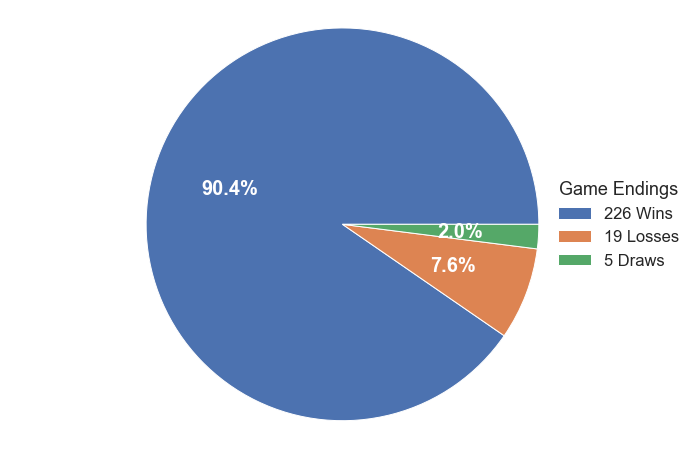

In [49]:
labels = 'Wins', 'Losses', 'Draws'
data = [wins, losses, draws]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', textprops=dict(color="w"))
ax.axis('Equal')
data = [str(wins) + " Wins", str(losses) + " Losses", str(draws) + " Draws"]
ax.legend(wedges, data, title="Game Endings", loc="center left", bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.setp(autotexts, size=20, weight="bold")
plt.savefig("game_endings.png")

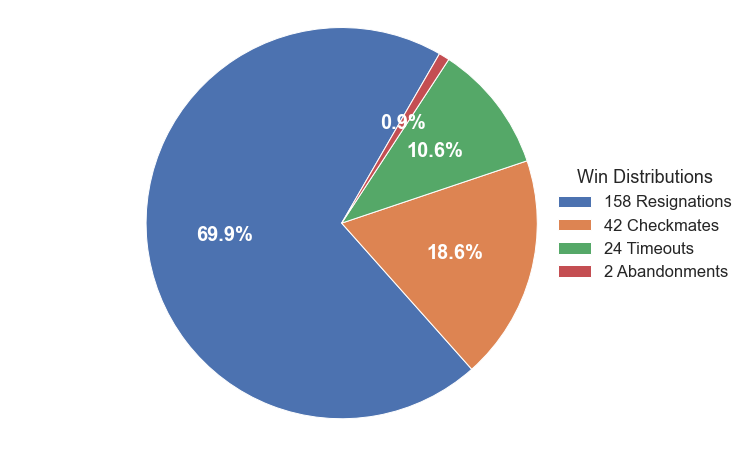

In [50]:
labels = 'Checkmate', 'Resignation', 'Time', 'Abandonment'
data = [wins_by_resignation, wins_by_checkmate, wins_by_time, wins_by_abandonment]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', textprops=dict(color="w"), startangle=60)
ax.axis('Equal')
data = [str(wins_by_resignation) + " Resignations", str(wins_by_checkmate) + " Checkmates", str(wins_by_time) + " Timeouts", str(wins_by_abandonment) + " Abandonments"]
ax.legend(wedges, data, title="Win Distributions", loc="center left", bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.setp(autotexts, size=20, weight="bold")
plt.savefig("win_distributions.png")